In [125]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [126]:
# Reading ratings file
# Ignore the timestamp column

ratings = pd.read_csv('ratings.csv', sep=',', usecols=['userId', 'movieId', 'rating'])
movies = pd.read_csv('movies.csv', sep=',', usecols=[ 'movieId','title', 'genres'])
links = pd.read_csv('links.csv', sep=',', usecols=[ 'movieId','imdbId', 'tmdbId'])

In [127]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [128]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [129]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [130]:
# merging the databases
df_temp22 = pd.merge(ratings, movies, on = 'movieId')
data= pd.merge(links, df_temp22, on = 'movieId')
data.head()

,movieId,imdbId,tmdbId,userId,rating,title,genres
0,1,114709,862.0,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,114709,862.0,5,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,1,114709,862.0,7,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,1,114709,862.0,15,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,1,114709,862.0,17,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [7]:
data.shape

(27753444, 7)

In [4]:
# checking details
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  100836 non-null  int64  
 1   imdbId   100836 non-null  int64  
 2   tmdbId   100823 non-null  float64
 3   userId   100836 non-null  int64  
 4   rating   100836 non-null  float64
 5   title    100836 non-null  object 
 6   genres   100836 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 6.2+ MB


In [9]:
data.to_csv('data.csv', header=False, index=False)

In [131]:
# Create a function to find genres in the dataset

genres = {} # creating a dictionary to store different genre values

def find_genres():
    for genre in movies['genres']:
        words = genre.split('|')
        for word in words:
            genres[word] = genres.get(word, 0) + 1
            
find_genres()

In [132]:
genres

{'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Fantasy': 779,
 'Romance': 1596,
 'Drama': 4361,
 'Action': 1828,
 'Crime': 1199,
 'Thriller': 1894,
 'Horror': 978,
 'Mystery': 573,
 'Sci-Fi': 980,
 'War': 382,
 'Musical': 334,
 'Documentary': 440,
 'IMAX': 158,
 'Western': 167,
 'Film-Noir': 87,
 '(no genres listed)': 34}

In [133]:
# replacing '(no genres listed)' by 'None'
genres['None'] = genres.pop('(no genres listed)')

In [134]:

#Getting the average movie rating across all movies 
avg_rating_all=data['rating'].mean()
avg_rating_all
#set a minimum threshold for number of reviews that the movie has to have
min_reviews=30
avg_movie_rating = pd.DataFrame(data.groupby('movieId')['rating'].agg(['mean','count']))
movie_score = avg_movie_rating.loc[avg_movie_rating['count']>min_reviews]
movie_score.head()

,mean,count
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
5,3.071429,49
6,3.946078,102


In [135]:
#creating a function for weighted rating score based off count of reviews
def weighted_rating(x, m=min_reviews, C=avg_rating_all):
    v = x['count']
    R = x['mean']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

## EDA

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  100836 non-null  int64  
 1   imdbId   100836 non-null  int64  
 2   tmdbId   100823 non-null  float64
 3   userId   100836 non-null  int64  
 4   rating   100836 non-null  float64
 5   title    100836 non-null  object 
 6   genres   100836 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 6.2+ MB


In [137]:
# Top 5 Genres
from heapq import nlargest
Five_Highest = nlargest(5, genres, key = genres.get)
 
for val in Five_Highest:
    print(val, ":", genres.get(val))

Drama : 4361
Comedy : 3756
Thriller : 1894
Action : 1828
Romance : 1596


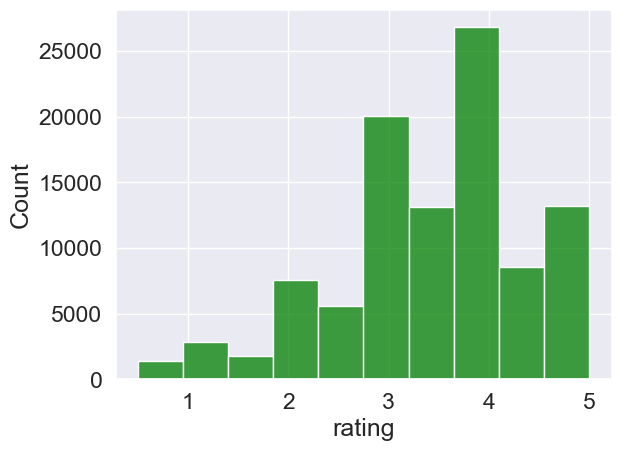

In [138]:
# Import seaborn library
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.histplot(data['rating'].fillna(data['rating'].median()),bins = 10,color= 'Green')
fig.savefig("Ratings-count.png")


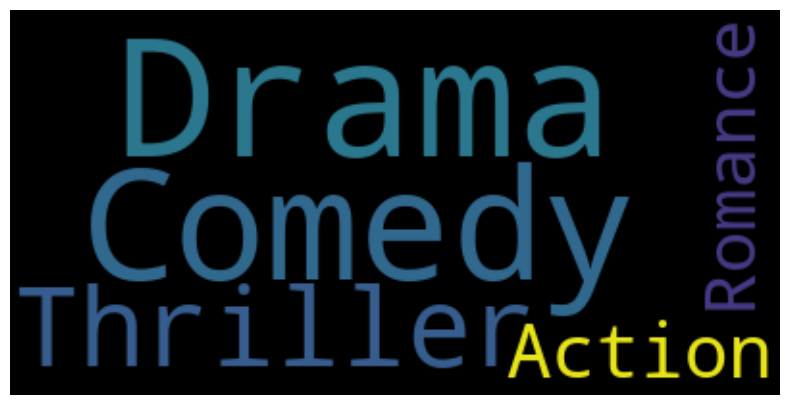

In [139]:
# Most genres in the database
from wordcloud import WordCloud

wordcloud = WordCloud(width=400, height=200, background_color = 'black',max_words=5,collocations = False, min_font_size=7).generate_from_frequencies(genres)

fig, ax = plt.subplots(figsize=(10, 5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()
fig.savefig("C:/Project/ml-latest/Top_genres.png")

In [183]:
df_4 = pd.read_csv('df_4.csv', sep=',',index_col=None)

In [187]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     10 non-null     int64 
 1   Film_director  10 non-null     object
 2   popularity     10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [181]:
from wordcloud import WordCloud
df_4 = pd.read_csv('df_4.csv', sep=',',index_col=None)
wordcloud = WordCloud(width=400, height=200, background_color = 'black',max_words=5,collocations = False, min_font_size=7).generate_from_frequencies(df_4)

fig, ax = plt.subplots(figsize=(10, 5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()
#fig.savefig("C:/Project/ml-latest/Top_genres.png")

TypeError: '<' not supported between instances of 'str' and 'int'

In [140]:
ratings_per_title = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings_per_title['total ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratings_per_title.rename(columns = {'rating': 'mean ratings'}, inplace=True)

round(ratings_per_title.sort_values('total ratings', ascending=False).head(10),2)

,mean ratings,total ratings
title,,
Forrest Gump (1994),4.16,329
"Shawshank Redemption, The (1994)",4.43,317
Pulp Fiction (1994),4.20,307
"Silence of the Lambs, The (1991)",4.16,279
"Matrix, The (1999)",4.19,278
Star Wars: Episode IV - A New Hope (1977),4.23,251
Jurassic Park (1993),3.75,238
Braveheart (1995),4.03,237
Terminator 2: Judgment Day (1991),3.97,224


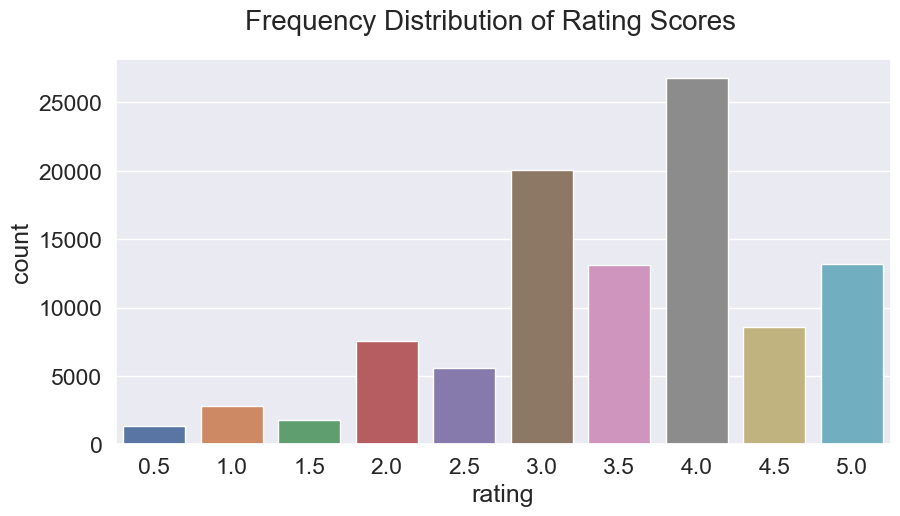

In [141]:
fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x = ratings.rating)
plt.suptitle('Frequency Distribution of Rating Scores', fontsize = 20)
fig.savefig("Ratings-dist.png")

In [142]:
import time
ratings1 = pd.read_csv('ratings.csv')
ratings1['year'] = ratings1['timestamp'].apply(lambda x: time.strftime('%Y', time.localtime(x)))
ratings1 = ratings1.drop(['timestamp', 'userId'], axis=1)

movie_ratings = pd.merge(ratings, movies)
movie_ratings.head()

# Compute the average rating for each movie
avg_ratings = movie_ratings.groupby(['movieId', 'title', 'genres'], as_index=False)['rating'].mean()
avg_ratings.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [143]:
# Compute a list of distinct genres 
all_genres = []
for x in avg_ratings.genres:
    all_genres.extend(x.split('|'))    
all_genres = pd.unique(all_genres)

print(all_genres)

['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'War' 'Musical'
 'Documentary' 'IMAX' 'Western' 'Film-Noir' '(no genres listed)']


In [144]:
avg_ratings = movie_ratings.groupby(['movieId', 'title', 'genres'], as_index=False)['rating'].mean()
avg_ratings.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [145]:
split_genres = avg_ratings['genres'].str.split('|')
split_data = pd.DataFrame({'genres':split_genres.values}, index = split_genres.index)

split_data['rating'] = avg_ratings['rating']
split_data['title'] = avg_ratings['title']
split_data['movieId'] = avg_ratings['movieId']

split_data.head()

,genres,rating,title,movieId
0,"[Adventure, Animation, Children, Comedy, Fantasy]",3.920930,Toy Story (1995),1
1,"[Adventure, Children, Fantasy]",3.431818,Jumanji (1995),2
2,"[Comedy, Romance]",3.259615,Grumpier Old Men (1995),3
3,"[Comedy, Drama, Romance]",2.357143,Waiting to Exhale (1995),4
4,[Comedy],3.071429,Father of the Bride Part II (1995),5


In [146]:
objs = [split_data, pd.DataFrame(split_data['genres'].tolist())]
new_df = pd.concat(objs, axis=1).drop('genres', axis=1).sort_values('rating', ascending=False)
final_ratings = pd.melt(new_df, var_name='genre', value_name="genres", id_vars=['movieId','rating','title'], value_vars=[0,1,2,3,4,5,6,7,8]).sort_values('rating', ascending=False)
final_ratings = final_ratings[final_ratings.genres.notnull()].drop("genre", axis=1)
final_ratings.sort_values(by=['movieId'], inplace=True)
final_ratings.head()

,movieId,rating,title,genres
12129,1,3.92093,Toy Story (1995),Animation
41301,1,3.92093,Toy Story (1995),Fantasy
2405,1,3.92093,Toy Story (1995),Adventure
21853,1,3.92093,Toy Story (1995),Children
31577,1,3.92093,Toy Story (1995),Comedy


In [174]:
# count of number of genres in database
genre_count = final_ratings.groupby('genres').count()[['movieId']]
genre_count = genre_count.rename(columns = {'movieId': 'count'})
genre_count = genre_count.sort_values('count', ascending=False)

count = genre_count['count'].tolist()
genre = genre_count.index.tolist()
genre_count = pd.DataFrame({'genre': genre, 'count': count})
genre_count = genre_count.iloc[0:18]
genre_count

,genre,count
0,Drama,4349
1,Comedy,3753
2,Thriller,1889
3,Action,1828
4,Romance,1591
5,Adventure,1262
6,Crime,1196
7,Sci-Fi,980
8,Horror,977
9,Fantasy,778


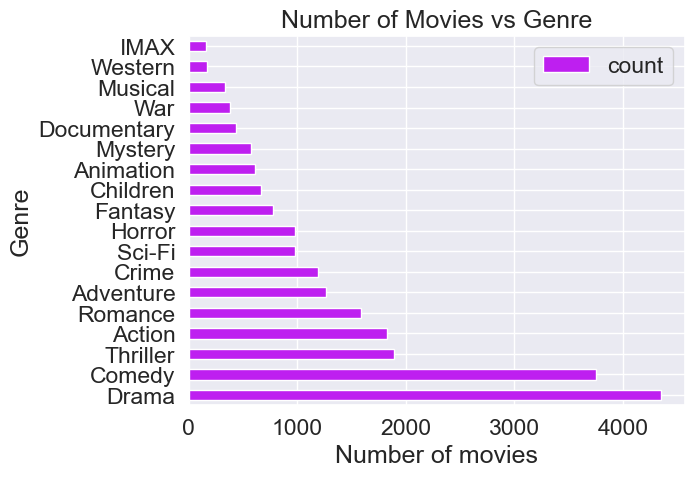

In [150]:
genre_count.plot.barh(x = 'genre', y = 'count',color = '#BE1FF0')
plt.xlabel('Number of movies')
plt.ylabel('Genre')
plt.title('Number of Movies vs Genre')
fig.savefig('Number of Movies vs Genres.png')

In [58]:
# avg ratings with genres 
avg_genre_ratings = data.groupby(['genres'], as_index=False)['rating'].mean()
avg_genre_ratings = avg_genre_ratings.sort_values(by=['rating'], ascending=False)
avg_genre_ratings

,genres,rating
638,Comedy|Crime|Drama|Horror,5.0
440,Adventure|Comedy|Fantasy|Musical,5.0
547,Animation|Children|Mystery,5.0
575,Animation|Drama|Sci-Fi|IMAX,5.0
467,Adventure|Drama|Fantasy|Horror|Sci-Fi,5.0
...,...,...
412,Adventure|Children|Comedy|Sci-Fi,0.5
833,Drama|Fantasy|Sci-Fi|Thriller,0.5
921,Horror|Sci-Fi|Western,0.5
211,Action|Comedy|Horror|Musical,0.5


In [115]:
# Highly Rated Movies
ratings_per_title.sort_values(by = ['mean ratings','total ratings'], ascending = [False, False]).head(10)

,mean ratings,total ratings
title,,
2 (2007),5.0,2
3-D Sex and Zen: Extreme Ecstasy (2011),5.0,2
A Royal Winter (2017),5.0,2
Awaken (2013),5.0,2
Brad Williams: Daddy Issues (2016),5.0,2
Genius on Hold (2013),5.0,2
Hooligan (1998),5.0,2
Love Finds You in Valentine (2016),5.0,2
North of the Sun (2012),5.0,2


In [123]:
print('Total no of users that gave rating of 5.0 : ', len(ratings_per_title.loc[ratings_per_title['mean ratings'] == 5]), '\n')
print('Total no of Individual users that gave rating of 5.0 : ', len(ratings_per_title.loc[(ratings_per_title['mean ratings'] == 5) 
                                                                           & (ratings_per_title['total ratings'] == 1)]))

Total no of users that gave rating of 5.0 :  536 

Total no of Individual users that gave rating of 5.0 :  511


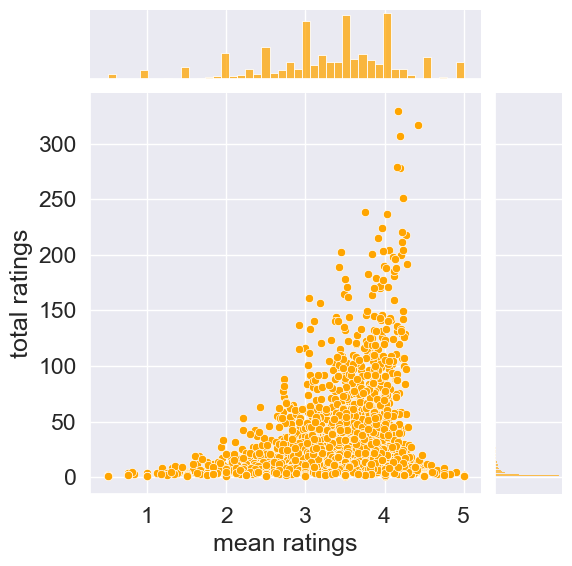

In [43]:
#Mean Ratings vs Total Number of Ratings
sns.jointplot(x = 'mean ratings', y = 'total ratings', data = ratings_per_title, color = 'Orange' )
plt.savefig('mean-Ratings.png')

In [132]:
#Calculating the weighted score for each movie
movie_score['weighted_score'] = movie_score.apply(weighted_rating, axis=1)
round(movie_score.head(),2)

,mean,count,weighted_score
movieId,,,
1,3.89,68469,3.89
2,3.25,27143,3.25
3,3.17,15585,3.17
4,2.87,2989,2.88
5,3.08,15474,3.08


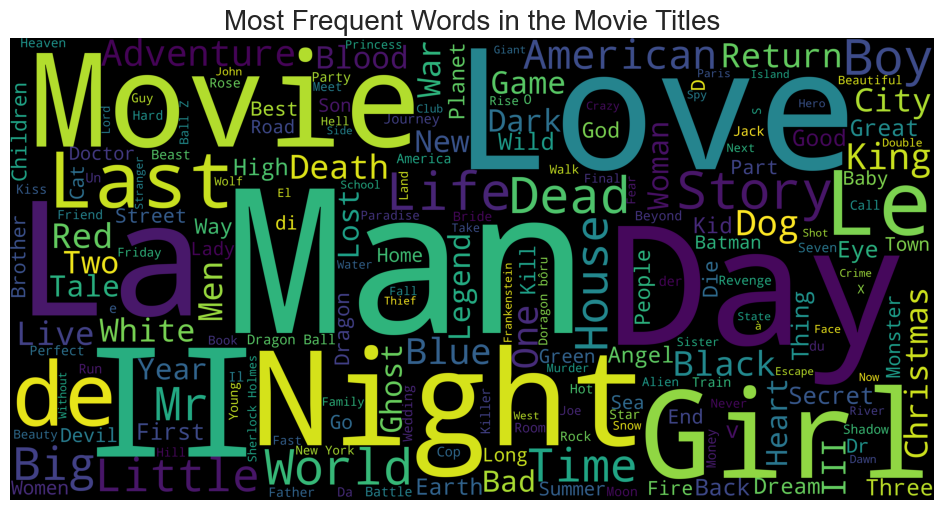

In [60]:
# Wordcloud showing most frequent words in the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(14,6))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Titles', fontsize = 20)
plt.show()
fig.savefig('Wordcloud-keywords.png') 

## Content-Based Recommendation Engine

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(data['genres'])
tfidf_matrix.shape

(27753444, 192)

I will be using the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movies. Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score. Therefore, we will use sklearn's linear_kernel instead of cosine_similarities since it is much faster.